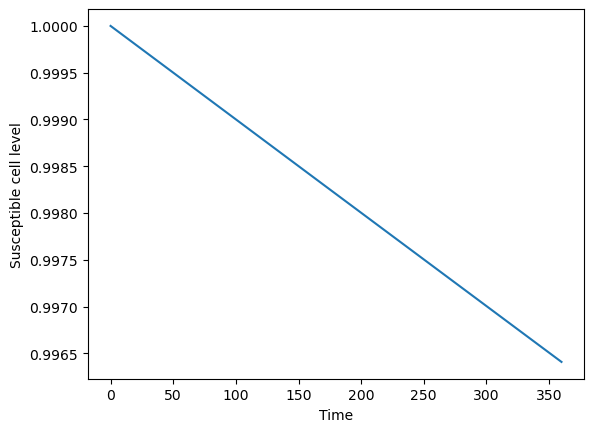

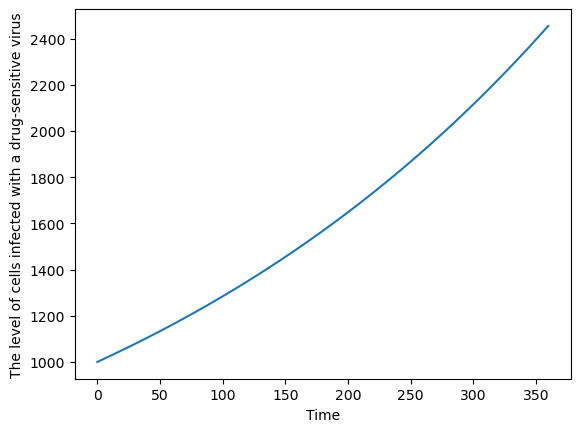

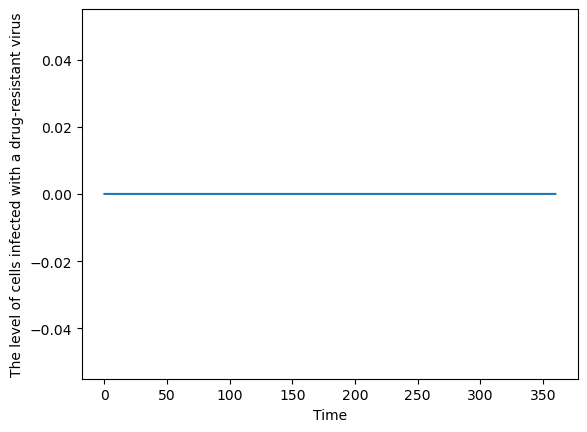

In [1]:
# Model based on differential equations
# Excercise 1
# How does the effectiveness of drugs affect the time of emergence of drug resistance? Simulate with different values of ϵ (epsilon). Plot the fraction of resistant viruses over time in simulations.
import matplotlib.pyplot as plt
from numpy import array, zeros, arange
def HIV(state,t):
    T = state[0]           # T susceptible cells
    Is = state[1]          # I infected cells
    Ir = state[2]          # V amount of active virus
    b = 1
#    ds=-beta*S*I/Npop 
    dT = Lambda-d*T-(1-epsilon)*b*T*Is/susceptible_cells
    dIs = (1-epsilon)*(1-m)*bs*Is*T/susceptible_cells#-a*Is
    dIr = br*T*Ir/susceptible_cells-a*Ir+(1-epsilon)*m*bs*Is*T/susceptible_cells
    return array([dT,dIs,dIr])

def Runge_Kutta(y, t, dt, derivative):
    k1 = dt*derivative(y,t)
    k2 = dt*derivative(y+k1/2.,t+0.5*dt)
    k3 = dt*derivative(y+k2/2.,t+0.5*dt)
    k4 = dt*derivative(y+k3,t+dt)
    y_next = y+1/6.*(k1+2*k2+2*k3+k4)
    return y_next

global a, susceptible_cells, Lambda, d, epsilon, bs, br, m

d = 10 ** -5  # 0.000001       # Apoptosis rate of susceptible cells

Lambda = 10          # Susceptible cells recovery speed
epsilon = 0.99       # The effectiveness of the drug, simulate with different values of ϵ

bs = 0.25            # Effectiveness of infection of subsequent T lymphocytes by viruses sensitive to therapy
br = 0.24            # Effectiveness of infection of subsequent T lymphocytes by viruses resistant to therapy
m = 0                # Eate of viral mutation towards resistance to therapy
#b=1.1               # Infection rate of susceptible cells
a = 0.001            # Cell destruction speed
#k=1                 # Virus production rate in infected cells
#u=1                 # Virus death rate
susceptible_cells = 2*(10**12)  # Number of T lymphocytes in peripheral blood 0,77-2,68 x 10**9/1
To = susceptible_cells
Iro = 0 # Vo 
Iso = 10**3 # Io
dt = 0.1
to = 0
te = 12*30
t = arange(to, te, dt)
N = len(t)
y = zeros([N,3])
y[0,0] = To
y[0,1] = Iso
y[0,2] = Iro

for i in range(N-1):
    y[i+1]=Runge_Kutta(y[i], t[i], dt, HIV)

Tt=[y[j,0]/susceptible_cells for j in range(N)]
Is=[y[j,1] for j in range(N)]
Ir=[y[j,2] for j in range(N)]

#plt.subplot(2,1,1)
plt.plot(t,Tt)
plt.ylabel("Susceptible cell level") # T
plt.xlabel("Time")
plt.show()

#plt.subplot(2,1,2)
plt.plot(t,Is)
plt.ylabel("The level of cells infected with a drug-sensitive virus") # Is
plt.xlabel("Time")
plt.show()

#plt.subplot(3,1,3)
plt.plot(t,Ir)
plt.ylabel("The level of cells infected with a drug-resistant virus") # Ir
plt.xlabel("Time")
plt.show()

In [2]:
# For epsilon=0.99:
'''
The level of susceptible cells declines very slowly. 
The increase in HIV virus units over the course of the simulation also increases very slowly. 
This is due to the administration of a large amount of the drug. 
The absence of a treatment-resistant HIV strain is due to its removal from the simulation.
'''

'\nThe level of susceptible cells declines very slowly. \nThe increase in HIV virus units over the course of the simulation also increases very slowly. \nThis is due to the administration of a large amount of the drug. \nThe absence of a treatment-resistant HIV strain is due to its removal from the simulation.\n'

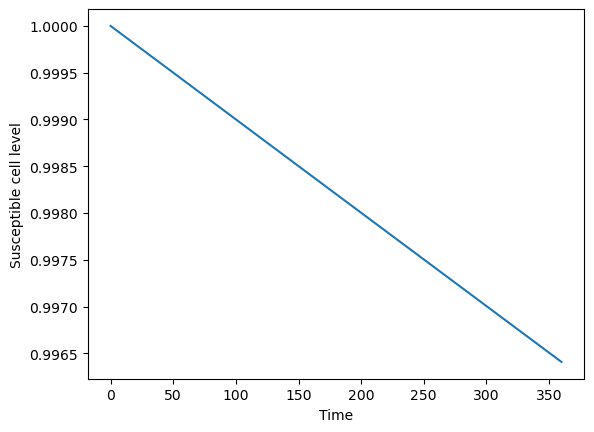

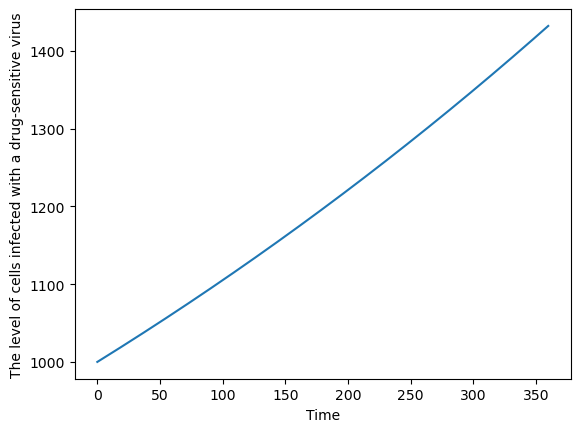

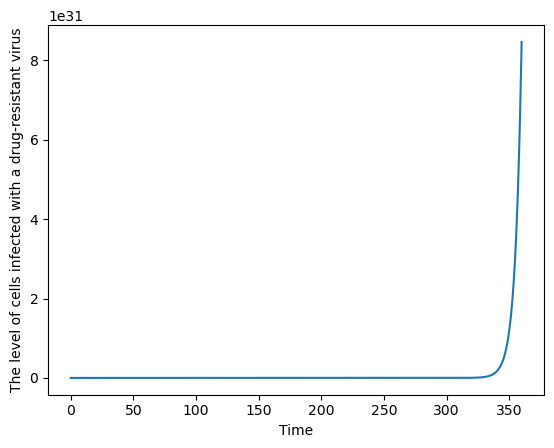

In [3]:
# Excercise 2
# Consider a resistance mutation that significantly reduces the replication ability or infectivity of the mutant br= 0.2.
# Simulate a strong drug and a high mutation rate
import matplotlib.pyplot as plt
from numpy import array,zeros,arange
def HIV(state,t):
    T=state[0]           
    Is=state[1]         
    Ir=state[2]     
    b = 1
#   ds=-beta*S*I/Npop 
    dT=Lambda-d*T-(1-epsilon)*b*T*Is/susceptible_cells
    dIs=(1-epsilon)*(1-m)*bs*Is*T/susceptible_cells#-a*Is
    dIr = br*T*Ir/susceptible_cells-a*Ir+(1-epsilon)*m*bs*Is*T/susceptible_cells
    return array([dT,dIs,dIr])

def Runge_Kutta(y,t,dt,derivative):
    k1=dt*derivative(y,t)
    k2=dt*derivative(y+k1/2.,t+0.5*dt)
    k3=dt*derivative(y+k2/2.,t+0.5*dt)
    k4=dt*derivative(y+k3,t+dt)
    y_next=y+1/6.*(k1+2*k2+2*k3+k4)
    return y_next

global a, susceptible_cells, Lambda, d, epsilon, bs, br, m

d = 10 ** -5  #0.000001     
Lambda = 10         
epsilon = 0.99      # Effectiveness of the drug #change to a weak drug, 0.01
bs = 0.25           
br = 0.2            # Effectiveness of infection of subsequent T lymphocytes by viruses resistant to therapy #change to 0.2
m = 0.6               
#b=1.1               
a = 0.001            
susceptible_cells = 2*(10**12) 
To = susceptible_cells
Iro = 0 #Vo ?
Iso = 10**3 #Io ?
dt = 0.1
to = 0
te = 12*30
t = arange(to,te,dt)
N = len(t)
y = zeros([N,3])
y[0,0] = To
y[0,1] = Iso
y[0,2] = Iro

for i in range(N-1):
    y[i+1]=Runge_Kutta(y[i],t[i],dt,HIV)

Tt=[y[j,0]/susceptible_cells for j in range(N)]
Is=[y[j,1] for j in range(N)]
Ir=[y[j,2] for j in range(N)]

#plt.subplot(2,1,1)
plt.plot(t,Tt)
plt.ylabel("Susceptible cell level") # T
plt.xlabel("Time")
plt.show()

#plt.subplot(2,1,2)
plt.plot(t,Is)
plt.ylabel("The level of cells infected with a drug-sensitive virus") # Is
plt.xlabel("Time")
plt.show()

#plt.subplot(3,1,3)
plt.plot(t,Ir)
plt.ylabel("The level of cells infected with a drug-resistant virus") # Ir
plt.xlabel("Time")
plt.show()

In [4]:
'''
In a simulation of infection with a strong drug and a high mutation rate of the HIV virus, 
a very slow growth of the non-resistant virus can be seen. 
The increase in the number of drug-resistant HIV virus particles is rapid and gives rise to a huge number of viruses. 
It occurs with a time lag relative to the growth of the non-immune virus.
'''

'\nIn a simulation of infection with a strong drug and a high mutation rate of the HIV virus, \na very slow growth of the non-resistant virus can be seen. \nThe increase in the number of drug-resistant HIV virus particles is rapid and gives rise to a huge number of viruses. \nIt occurs with a time lag relative to the growth of the non-immune virus.\n'

In [5]:
# After after various simulations in Ex. 2:
'''
A virus that exhibits drug-resistant properties is not always dominant in the host organism. 
The condition for its supremacy is a high frequency of mutations towards drug resistance. 
The maximum effect of pharmacotherapy is to delay the growth of viral particles.
'''

'\nA virus that exhibits drug-resistant properties is not always dominant in the host organism. \nThe condition for its supremacy is a high frequency of mutations towards drug resistance. \nThe maximum effect of pharmacotherapy is to delay the growth of viral particles.\n'

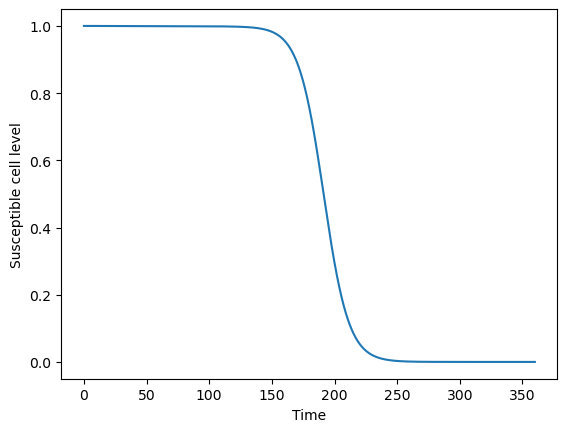

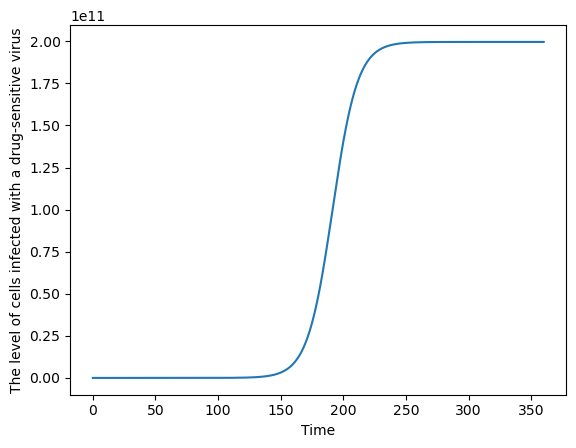

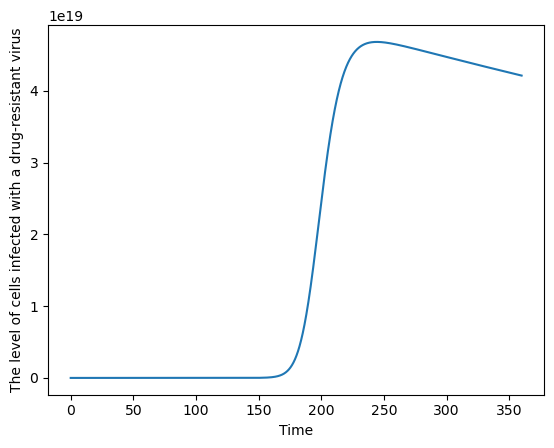

Steady state mutant fraction:  3.0000000000000004


In [6]:
# Excercise 3
# Mutations arise all the time: Resistance mutations also arise in the absence of therapy. Given the large population size and rapid mutation rate of the HIV virus, mutants resistant to particular drugs may be present at the beginning of treatment. Set ϵ = 0 and let the simulation run until the mutant fraction reaches a steady state.
import matplotlib.pyplot as plt
from numpy import array,zeros,arange
def HIV(state, t):
    T=state[0]           
    Is=state[1]          
    Ir=state[2]  
    b = 1
#   ds=-beta*S*I/Npop 
    dT=Lambda-d*T-(1-epsilon)*b*T*Is/susceptible_cells
    dIs=(1-epsilon)*(1-m)*bs*Is*T/susceptible_cells#-a*Is
    dIr = br*T*Ir/susceptible_cells-a*Ir+(1-epsilon)*m*bs*Is*T/susceptible_cells
    return array([dT,dIs,dIr])

def Runge_Kutta(y, t, dt, derivative):
    k1=dt*derivative(y,t)
    k2=dt*derivative(y+k1/2.,t+0.5*dt)
    k3=dt*derivative(y+k2/2.,t+0.5*dt)
    k4=dt*derivative(y+k3,t+dt)
    y_next=y+1/6.*(k1+2*k2+2*k3+k4)
    return y_next

global a, susceptible_cells, Lambda, d, epsilon, bs, br, m

d = 10 ** -5  #0.000001       

Lambda = 10          
epsilon = 0      

bs = 0.25          
br = 0.2            
m = 0.6           
#b=1.1               
a = 0.001            

susceptible_cells = 2*(10**12)  
To = susceptible_cells
Iro = 0 # Vo 
Iso = 10**3 # Io
dt = 0.1
to = 0
te = 12*30
t = arange(to,te,dt)
N = len(t)
y = zeros([N,3])
y[0,0] = To
y[0,1] = Iso
y[0,2] = Iro

for i in range(N-1):
    y[i+1] = Runge_Kutta(y[i],t[i],dt,HIV)

Tt=[y[j,0]/susceptible_cells for j in range(N)]
Is=[y[j,1] for j in range(N)]
Ir=[y[j,2] for j in range(N)]

#plt.subplot(2,1,1)
plt.plot(t,Tt)
plt.ylabel("Susceptible cell level") # T
plt.xlabel("Time")
plt.show()

#plt.subplot(2,1,2)
plt.plot(t,Is)
plt.ylabel("The level of cells infected with a drug-sensitive virus") # Is
plt.xlabel("Time")
plt.show()

#plt.subplot(3,1,3)
plt.plot(t,Ir)
plt.ylabel("The level of cells infected with a drug-resistant virus") # Ir
plt.xlabel("Time")
plt.show()

fraction = m/(1-(br/bs))
print("Steady state mutant fraction: ",fraction)

In [7]:
'''
Result: During the simulation, which does not include drug therapy, the virus growth rate and mutation rate are high. 
This causes a rapid increase in the number of virus particles.
'''

'\nResult: During the simulation, which does not include drug therapy, the virus growth rate and mutation rate are high. \nThis causes a rapid increase in the number of virus particles.\n'